In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
from folium import plugins

In [3]:
#Manipulating the default plot size
plt.rcParams['figure.figsize']=10,12

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
#reading the dataset
df=pd.read_excel('Covid cases in India.xlsx')
df_india=df.copy()
df

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,9,0,0,0
1,2,Bihar,3,0,0,1
2,3,Chhattisgarh,1,0,0,0
3,4,Delhi,30,1,6,1
4,5,Gujarat,32,1,0,1
5,6,Haryana,14,14,11,0
6,7,Himachal Pradesh,3,0,0,1
7,8,Karnataka,41,0,3,1
8,9,Kerala,101,8,4,0
9,10,Madhya Pradesh,9,0,0,0


In [6]:
#day by day data of india,korea,italy and wuhan
dbd_India=pd.read_excel('per_day_cases.xlsx',parse_dates=True,sheet_name='India')
dbd_Italy=pd.read_excel('per_day_cases.xlsx',parse_dates=True,sheet_name='Italy')
dbd_Korea=pd.read_excel('per_day_cases.xlsx',parse_dates=True,sheet_name='Korea')
dbd_Wuhan=pd.read_excel('per_day_cases.xlsx',parse_dates=True,sheet_name='Wuhan')

In [7]:
df.drop(['S. No.'],axis=1,inplace=True)

In [8]:
df

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,Andhra Pradesh,9,0,0,0
1,Bihar,3,0,0,1
2,Chhattisgarh,1,0,0,0
3,Delhi,30,1,6,1
4,Gujarat,32,1,0,1
5,Haryana,14,14,11,0
6,Himachal Pradesh,3,0,0,1
7,Karnataka,41,0,3,1
8,Kerala,101,8,4,0
9,Madhya Pradesh,9,0,0,0


In [9]:
df['Total cases']=df['Total Confirmed cases (Indian National)']+df['Total Confirmed cases ( Foreign National )']

In [10]:
df

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total cases
0,Andhra Pradesh,9,0,0,0,9
1,Bihar,3,0,0,1,3
2,Chhattisgarh,1,0,0,0,1
3,Delhi,30,1,6,1,31
4,Gujarat,32,1,0,1,33
5,Haryana,14,14,11,0,28
6,Himachal Pradesh,3,0,0,1,3
7,Karnataka,41,0,3,1,41
8,Kerala,101,8,4,0,109
9,Madhya Pradesh,9,0,0,0,9


In [11]:
total_cases=df['Total cases'].sum()

In [12]:
print('Total number of confirmed COVID 2019 cases across India till 22nd March 2020:',total_cases)

Total number of confirmed COVID 2019 cases across India till 22nd March 2020: 562


In [13]:
df.style.background_gradient(cmap='Reds')

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total cases
0,Andhra Pradesh,9,0,0,0,9
1,Bihar,3,0,0,1,3
2,Chhattisgarh,1,0,0,0,1
3,Delhi,30,1,6,1,31
4,Gujarat,32,1,0,1,33
5,Haryana,14,14,11,0,28
6,Himachal Pradesh,3,0,0,1,3
7,Karnataka,41,0,3,1,41
8,Kerala,101,8,4,0,109
9,Madhya Pradesh,9,0,0,0,9


In [14]:
#Total Active is the Total cases - (Number of death + Cured)
df['Total Active']=df['Total cases']-(df['Death']+df['Cured'])
total_active=df['Total Active'].sum()
print('Total no. of active COVID 2019 cases across INDIA:',total_active)

Total no. of active COVID 2019 cases across INDIA: 512


In [15]:
Tot_Cases=df.groupby('Name of State / UT')['Total Active'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

,Total Active
Name of State / UT,
Kerala,105
Maharashtra,99
Karnataka,37
Telengana,34
Gujarat,32
Rajasthan,29
Punjab,28
Uttar Pradesh,24
Delhi,24


In [17]:
import plotly
plotly.io.renderers.default='browser'

In [18]:
fig=go.Figure()

In [64]:
fig.add_trace(go.Scatter(x=dbd_India['Date'],y=dbd_India['Total Cases'],mode='lines+markers',name='Total Cases'))
fig.update_layout(title_text='Trend of Coronavirus Cases in India',plot_bgcolor='rgb(230,230,230)')
fig.show()

import plotly.express as px
fig=px.bar(dbd_India,x='Date',y='New Cases',barmode='group',height=400)
fig.update_layout(title_text='Coronavirus Cases in India on daily basis',plot_bgcolor='rgb(230,230,230)')
fig.show()

In [20]:
#cumulative cases in India,Italy, S.Korea and Wuhan

In [21]:
dbd_India

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-30,1,1,NaN
1,2020-01-31,1,0,NaN
2,2020-02-01,1,0,NaN
3,2020-02-02,2,1,NaN
4,2020-02-03,3,1,NaN
5,2020-02-04,3,0,NaN
6,2020-02-05,3,0,NaN
7,2020-02-06,3,0,NaN
8,2020-02-07,3,0,NaN
9,2020-02-08,3,0,NaN


In [22]:
fig=px.bar(dbd_India,x='Date',y='Total Cases',color='Total Cases',orientation='v',
          height=600,title='Confirmed Cases in India',color_discrete_sequence=px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230,230,230)')
fig.show()


In [23]:
fig=px.bar(dbd_Italy,x='Date',y='Total Cases',color='Total Cases',orientation='v',
          height=600,title='Confirmed Cases in Italy',color_discrete_sequence=px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230,230,230)')
fig.show()


In [24]:
fig=px.bar(dbd_Korea,x='Date',y='Total Cases',color='Total Cases',orientation='v',
          height=600,title='Confirmed Cases in Korea',color_discrete_sequence=px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230,230,230)')
fig.show()

In [25]:
fig=px.bar(dbd_Wuhan,x='Date',y='Total Cases',color='Total Cases',orientation='v',
          height=600,title='Confirmed Cases in Wuhan',color_discrete_sequence=px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230,230,230)')
fig.show()

In [26]:
#Comparison between the rise of cases in Wihan,S.Korea,Italy and India

In [27]:
from plotly.subplots import make_subplots
fig=make_subplots(
    rows=2,cols=2,
    specs=[[{},{}],[{"colspan":2},None]],
    subplot_titles=("S.Korea","Italy","India","Wuhan")
    )
fig.add_trace(go.Bar(x=dbd_Korea['Date'],y=dbd_Korea['Total Cases'],
                     marker=dict(color=dbd_Korea['Total Cases'],coloraxis='coloraxis')),1,1)

fig.add_trace(go.Bar(x=dbd_Italy['Date'],y=dbd_Italy['Total Cases'],
                     marker=dict(color=dbd_Korea['Total Cases'],coloraxis='coloraxis')),1,2)

fig.add_trace(go.Bar(x=dbd_India['Date'],y=dbd_India['Total Cases'],
                     marker=dict(color=dbd_Korea['Total Cases'],coloraxis='coloraxis')),2,1)

# fig.add_trace(go.Bar(x=dbd_Wuhan['Date'],y=dbd_Wuhan['Total Cases'],
#                      marker=dict(color=dbd_Korea['Total Cases'],coloraxis='coloraxis')),2,2)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'),showlegend=False,title_text='Total Confirmed Cases(Cumulative)')
fig.show()

In [28]:
#Trend after crossing 100 cases

In [29]:
title='Main Source for News'
labels=['S.Korea','Italy','India']
colors=['rgb(122,128,0)','rgb(255,0,0)','rgb(49,130,189)']

mode_size=[10,10,12]
line_size=[1,1,8]

fig=go.Figure()

fig.add_trace(go.Scatter(x=dbd_Korea['Days after surpassing 100 cases'],
                        y=dbd_Korea['Total Cases'],mode='lines',name=labels[0],
                        line=dict(color=colors[0],width=line_size[0]),
                        connectgaps=True))

fig.add_trace(go.Scatter(x=dbd_Italy['Days after surpassing 100 cases'],
                        y=dbd_Italy['Total Cases'],mode='lines',name=labels[1],
                        line=dict(color=colors[1],width=line_size[1]),
                        connectgaps=True))

fig.add_trace(go.Scatter(x=dbd_India['Days after surpassing 100 cases'],
                        y=dbd_India['Total Cases'],mode='lines',name=labels[2],
                        line=dict(color=colors[2],width=line_size[2]),
                        connectgaps=True))

fig.update_layout(yaxis_title='Cumulative cases',xaxis_title='Days after crossing 100 cases')

In [30]:
#Exploring World wide data

In [31]:
df_confirmed=pd.read_csv('time_series_covid19_confirmed_global.csv')
df_recovered=pd.read_csv('time_series_covid19_recovered_global.csv')
df_deaths=pd.read_csv('time_series_covid19_deaths_global.csv')

In [32]:
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,16,21,22,22,22,24,24,40,40,74
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,42,51,55,59,64,70,76,89,104,123
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,48,54,60,74,87,90,139,201,230,264
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,2,39,39,53,75,88,113,133,164
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,1,2,2,3,3


In [33]:
df_confirmed.rename(columns={'Country/Region':'Country'},inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'},inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'},inplace=True)

In [34]:
df_confirmed.head()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,16,21,22,22,22,24,24,40,40,74
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,42,51,55,59,64,70,76,89,104,123
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,48,54,60,74,87,90,139,201,230,264
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,2,39,39,53,75,88,113,133,164
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,1,2,2,3,3


In [35]:
df=pd.read_csv('covid_19_clean_complete.csv',parse_dates=['Date'])
df.rename(columns={'ObservationDate':'Date','Country/Region':'Country'},inplace=True)

In [36]:
df.head()

,Province/State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0


In [37]:
df_deaths.head()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1,1,1,2,2,2,2,2,4,5
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,4,4,4,7,9,11,15,17,17,19
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df2=df.groupby(['Date','Country','Province/State'])[['Date','Province/State','Country','Confirmed','Deaths','Recovered']]
df2.head()

,Date,Province/State,Country,Confirmed,Deaths,Recovered
0,2020-01-22,NaN,Thailand,2.0,0.0,0.0
1,2020-01-22,NaN,Japan,2.0,0.0,0.0
2,2020-01-22,NaN,Singapore,0.0,0.0,0.0
3,2020-01-22,NaN,Nepal,0.0,0.0,0.0
4,2020-01-22,NaN,Malaysia,0.0,0.0,0.0
...,...,...,...,...,...,...
19191,2020-03-23,Sint Maarten,Netherlands,1.0,0.0,0.0
19194,2020-03-23,Isle of Man,United Kingdom,5.0,0.0,0.0
19196,2020-03-23,Northwest Territories,Canada,1.0,0.0,0.0
19210,2020-03-23,United States Virgin Islands,US,6.0,0.0,0.0


In [39]:
df.query('Country=="India"').groupby("Date")[['Confirmed','Deaths','Recovered']].sum().reset_index()

,Date,Confirmed,Deaths,Recovered
0,2020-01-22,0.0,0.0,0.0
1,2020-01-23,0.0,0.0,0.0
2,2020-01-24,0.0,0.0,0.0
3,2020-01-25,0.0,0.0,0.0
4,2020-01-26,0.0,0.0,0.0
...,...,...,...,...
57,2020-03-19,194.0,4.0,15.0
58,2020-03-20,244.0,5.0,20.0
59,2020-03-21,330.0,4.0,23.0
60,2020-03-22,396.0,7.0,27.0


In [40]:
confirmed=df.groupby('Date').sum()['Confirmed'].reset_index()
deaths=df.groupby('Date').sum()['Deaths'].reset_index()
recovered=df.groupby('Date').sum()['Recovered'].reset_index()

In [41]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=confirmed['Date'],y=confirmed['Confirmed'],mode='lines+markers',name='Confirmed',line=dict(color='Blue')))
fig.add_trace(go.Scatter(x=deaths['Date'],y=deaths['Deaths'],mode='lines+markers',name='Deaths',line=dict(color='Red')))
fig.add_trace(go.Scatter(x=recovered['Date'],y=recovered['Recovered'],mode='lines+markers',name='Recovered',line=dict(color='Green')))
fig.update_layout(title='Worldwide cases',yaxis_title='Number of cases')

# Forecasting the total number of Cases Worldwide

In [42]:
from fbprophet import Prophet

In [43]:
confirmed=df.groupby('Date').sum()['Confirmed'].reset_index()
deaths=df.groupby('Date').sum()['Deaths'].reset_index()
recovered=df.groupby('Date').sum()['Recovered'].reset_index()

In [44]:
confirmed

,Date,Confirmed
0,2020-01-22,554.0
1,2020-01-23,652.0
2,2020-01-24,939.0
3,2020-01-25,1432.0
4,2020-01-26,2113.0
...,...,...
57,2020-03-19,242708.0
58,2020-03-20,272166.0
59,2020-03-21,304524.0
60,2020-03-22,335955.0


In [45]:
confirmed.columns=['ds','y']
confirmed['ds']=pd.to_datetime(confirmed['ds'])

In [46]:
confirmed.tail()

,ds,y
57,2020-03-19,242708.0
58,2020-03-20,272166.0
59,2020-03-21,304524.0
60,2020-03-22,335955.0
61,2020-03-23,336004.0


# Generating a month ahead forecast of confirmed cases of NCOVID-19 using Prophet

In [47]:
m=Prophet(interval_width=0.95)
m.fit(confirmed)
future=m.make_future_dataframe(periods=30)

future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
87,2020-04-18
88,2020-04-19
89,2020-04-20
90,2020-04-21
91,2020-04-22


In [48]:
#predicting the future with date and upper and lower limit of y value
forecast=m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
87,2020-04-18,710141.317551,630163.929081,794408.277557
88,2020-04-19,726774.308084,634200.543566,817414.664900
89,2020-04-20,739996.001875,645878.979677,832663.626049
90,2020-04-21,752567.394412,648542.460143,851504.557689
91,2020-04-22,767643.299927,663246.790160,866966.686385


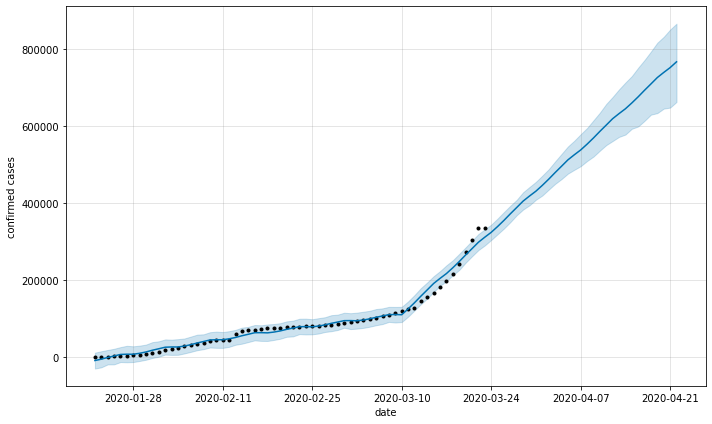

In [49]:
confirmed_forecast_plot=m.plot(forecast,xlabel='date',ylabel='confirmed cases')

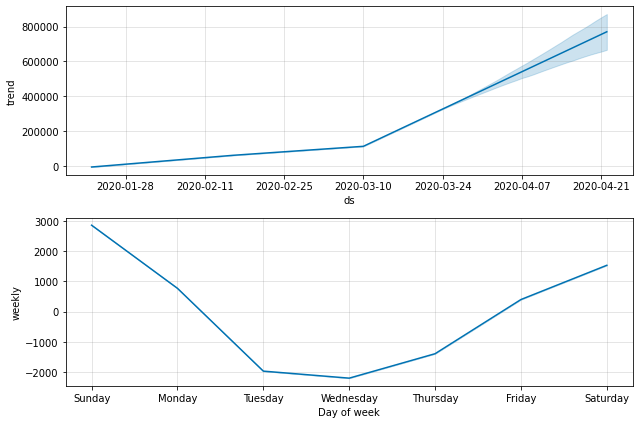

In [50]:
confirmed_forecast_plot=m.plot_components(forecast)

In [51]:
#Now Forecasting Worldwide Deaths using Prophet(Base Model)

In [52]:
deaths.columns=['ds','y']
deaths['ds']=pd.to_datetime(deaths['ds'])

In [53]:
m=Prophet(interval_width=0.95)
m.fit(deaths)
future=m.make_future_dataframe(periods=30)

future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
87,2020-04-18
88,2020-04-19
89,2020-04-20
90,2020-04-21
91,2020-04-22


In [54]:
#predicting the future with date and upper and lower limit of y value
forecast=m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
87,2020-04-18,32398.498827,28694.457579,36165.376301
88,2020-04-19,33223.099620,29248.795359,37067.493031
89,2020-04-20,33882.580414,29554.138117,38117.838519
90,2020-04-21,34484.393596,29959.996664,38849.184292
91,2020-04-22,35225.350068,30657.018088,39815.613099


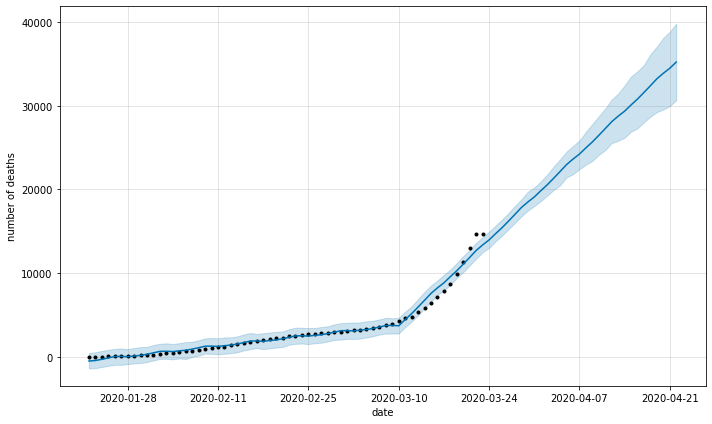

In [55]:
confirmed_forecast_plot=m.plot(forecast,xlabel='date',ylabel='number of deaths')

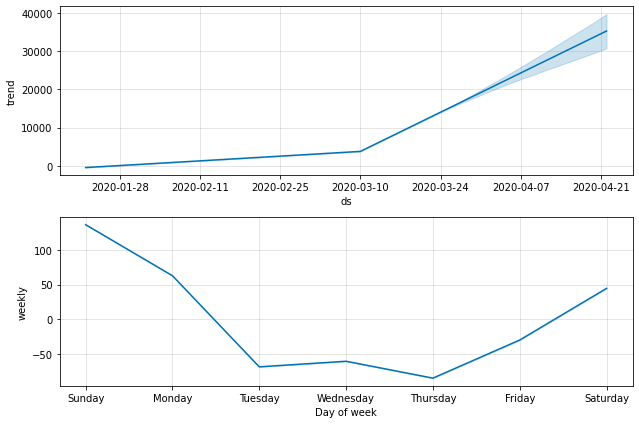

In [56]:
confirmed_forecast_plot=m.plot_components(forecast)

In [57]:
#Now Forecasting Worldwide Recovered Cases using Prophet(Base Model)

In [58]:
recovered.columns=['ds','y']
recovered['ds']=pd.to_datetime(recovered['ds'])

In [59]:
m=Prophet(interval_width=0.95)
m.fit(recovered)
future=m.make_future_dataframe(periods=30)

future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
87,2020-04-18
88,2020-04-19
89,2020-04-20
90,2020-04-21
91,2020-04-22


In [60]:
#predicting the future with date and upper and lower limit of y value
forecast=m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
87,2020-04-18,159009.249185,140721.011438,174544.171730
88,2020-04-19,161872.234406,142874.195553,178429.956335
89,2020-04-20,163997.899973,143529.930254,182041.000452
90,2020-04-21,166073.731835,145283.923780,184888.910576
91,2020-04-22,168428.605235,146085.777156,187870.297119


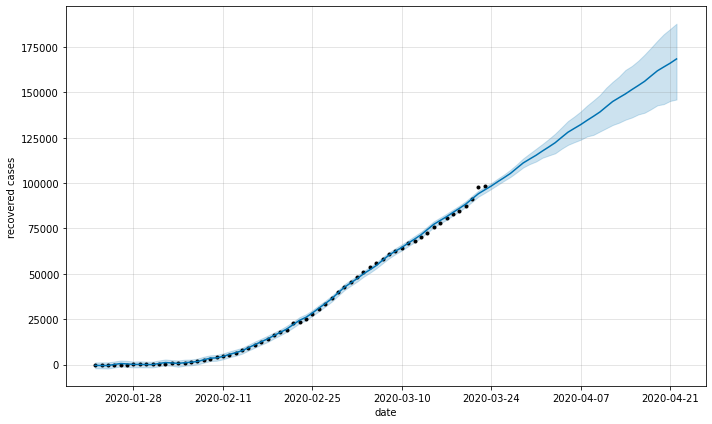

In [61]:
recovered_forecast_plot=m.plot(forecast,xlabel='date',ylabel='recovered cases')

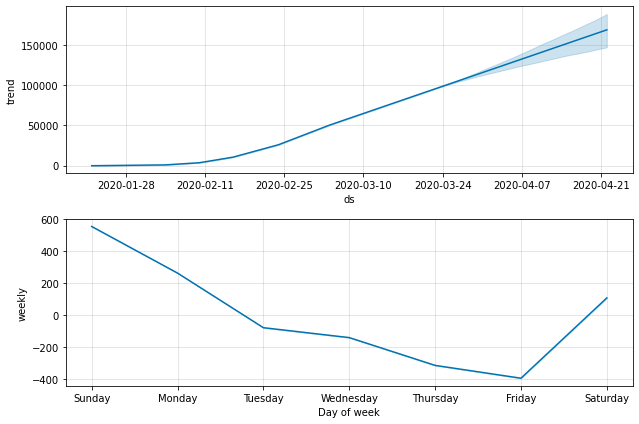

In [62]:
recovered_forecast_plot=m.plot_components(forecast)